In [1]:
# install machine gnostic learning packages
# ! pip install machinegnostics # only if not installed

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
!pip install ucimlrepo

In [4]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets 
  
# # metadata 
# print(wine_quality.metadata) 
  
# # variable information 
# print(wine_quality.variables) 


In [5]:
X.head()  # Display the first few rows of the features dataframe

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [6]:
# importing libraries
from machinegnostics.metrics import gcorrelation
import pandas as pd
import numpy as np

In [7]:
gcor = gcorrelation(X, y)

# printing the results
print("G-Correlation Results:")
display(gcor.sort_values(ascending=False, by = 'quality'))

G-Correlation Results:


,quality
chlorides,0.982795
free_sulfur_dioxide,0.982450
citric_acid,0.981344
residual_sugar,0.980924
sulphates,0.980540
density,0.980064
fixed_acidity,0.978046
volatile_acidity,0.976912
pH,0.973828
alcohol,0.970563


In [8]:
# train test split
from machinegnostics.models import train_test_split

# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_seed=42)

In [9]:
# importing machinegnostics regressor model
from machinegnostics.models.regression import PolynomialRegressor

rr = PolynomialRegressor(degree=2, verbose=True, early_stopping=True)

rr.fit(X_train, y_train)

Iteration: 1 - Machine Gnostic loss - hi : 4732.3584, rentropy: 0.6122
Iteration: 2 - Machine Gnostic loss - hi : 4754.3537, rentropy: 0.6025
Iteration: 3 - Machine Gnostic loss - hi : 4761.0907, rentropy: 0.5997
Iteration: 4 - Machine Gnostic loss - hi : 4761.0743, rentropy: 0.599
Iteration: 5 - Machine Gnostic loss - hi : 4760.5152, rentropy: 0.5985
Iteration: 6 - Machine Gnostic loss - hi : 4759.6832, rentropy: 0.5983
Iteration: 7 - Machine Gnostic loss - hi : 4758.6678, rentropy: 0.5981
Iteration: 8 - Machine Gnostic loss - hi : 4757.6101, rentropy: 0.5979
Iteration: 9 - Machine Gnostic loss - hi : 4756.5416, rentropy: 0.5977
Iteration: 10 - Machine Gnostic loss - hi : 4755.5253, rentropy: 0.5974
Iteration: 11 - Machine Gnostic loss - hi : 4754.5927, rentropy: 0.5971
Iteration: 12 - Machine Gnostic loss - hi : 4753.7282, rentropy: 0.5968
Iteration: 13 - Machine Gnostic loss - hi : 4752.971, rentropy: 0.5965
Iteration: 14 - Machine Gnostic loss - hi : 4752.264, rentropy: 0.5963
Iter

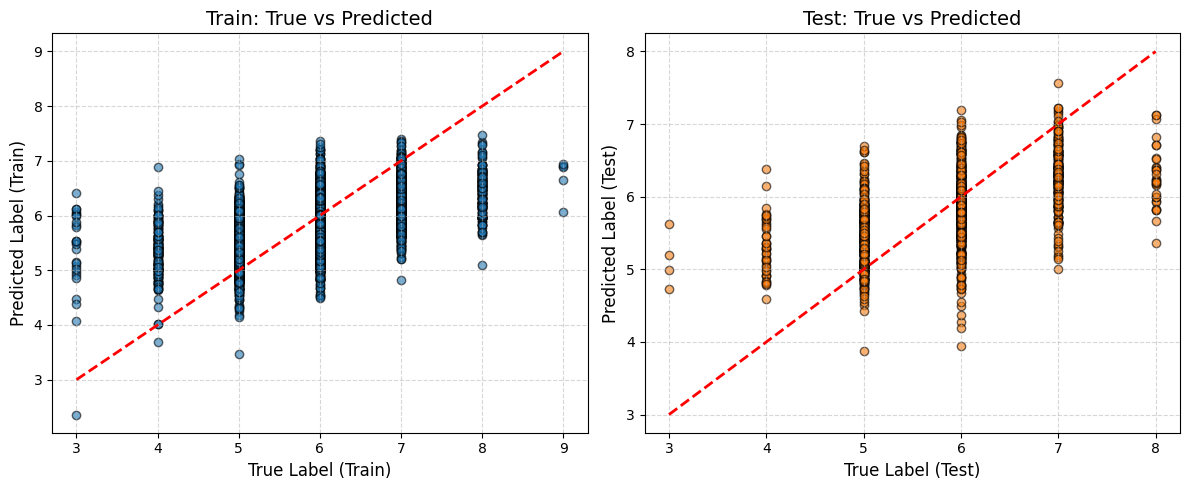

In [10]:
import matplotlib.pyplot as plt

# Predict on train and test data
y_train_pred = rr.predict(X_train)
y_test_pred = rr.predict(X_test)

plt.figure(figsize=(12, 5))

# Train plot
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.6, color='tab:blue', edgecolor='k')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('True Label (Train)', fontsize=12)
plt.ylabel('Predicted Label (Train)', fontsize=12)
plt.title('Train: True vs Predicted', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)

# Test plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.6, color='tab:orange', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('True Label (Test)', fontsize=12)
plt.ylabel('Predicted Label (Test)', fontsize=12)
plt.title('Test: True vs Predicted', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [11]:
# evaluating the model
from machinegnostics.metrics import robr2, root_mean_squared_error, r2_score, hc

from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

# Ensure targets are 1D arrays after splitting (do this once after train_test_split)
y_train = np.array(y_train).squeeze()
y_test = np.array(y_test).squeeze()

# Predict on train and test data
y_train_pred = rr.predict(X_train)
y_test_pred = rr.predict(X_test)

# Calculate metrics (no need for .ravel())
train_r2 = robr2(y_train, y_train_pred, w=rr.weights)
test_r2 = robr2(y_test, y_test_pred)
# Statistical r2
Statistical_train_r2 = r2_score(y_train, y_train_pred)
Statistical_test_r2 = r2_score(y_test, y_test_pred)

train_rmse = root_mean_squared_error(y_train, y_train_pred)
test_rmse = root_mean_squared_error(y_test, y_test_pred)

# calculate hc
train_hc = hc(y_train, y_train_pred, case='i')
test_hc = hc(y_test, y_test_pred, case='i')

# sklearn r2
sklearn_train_r2 = r2_score(y_train, y_train_pred)
sklearn_test_r2 = r2_score(y_test, y_test_pred)


# accuracy
train_accuracy = accuracy_score(y_train, np.round(y_train_pred))
test_accuracy = accuracy_score(y_test, np.round(y_test_pred))

print(f"Train Robust R2: {train_r2:.4f}")
print(f"Test Robust R2: {test_r2:.4f}")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Train Statistical R2: {Statistical_train_r2:.4f}")
print(f"Test Statistical R2: {Statistical_test_r2:.4f}")
print(f"Train H gnostic relevance: {train_hc:.4f}")
print(f"Test H gnostic relevance: {test_hc:.4f}")
print(f"Sklearn Train R2: {sklearn_train_r2:.4f}")
print(f"Sklearn Test R2: {sklearn_test_r2:.4f}")
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Train Robust R2: 0.9935
Test Robust R2: 0.3001
Train RMSE: 0.7093
Test RMSE: 0.7061
Train Statistical R2: 0.3515
Test Statistical R2: 0.2967
Train H gnostic relevance: 0.0531
Test H gnostic relevance: 0.0534
Sklearn Train R2: 0.3515
Sklearn Test R2: 0.2967
Train Accuracy: 0.5520
Test Accuracy: 0.5392


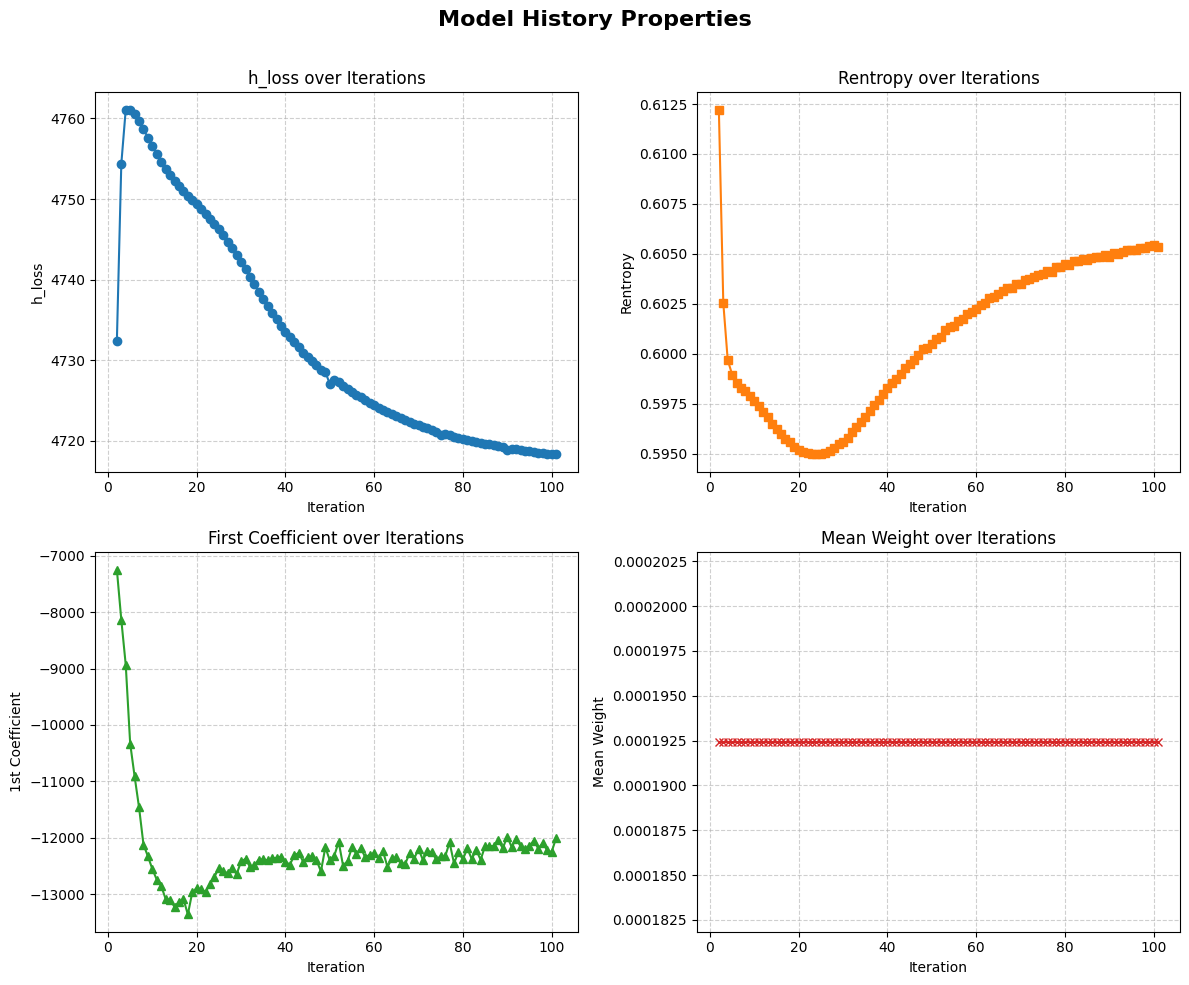

In [12]:
import matplotlib.pyplot as plt
import numpy as np

history = rr._history

# Remove entries with None for plotting
history_valid = [h for h in history if h['h_loss'] is not None]

iterations = [h['iteration'] for h in history_valid]
h_loss = [h['h_loss'] for h in history_valid]
rentropy = [h['rentropy'] for h in history_valid]
coef_0 = [h['coefficients'][0] for h in history_valid]
mean_weights = [np.mean(h['weights']) for h in history_valid]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].plot(iterations, h_loss, marker='o', color='tab:blue')
axes[0, 0].set_title('h_loss over Iterations')
axes[0, 0].set_xlabel('Iteration')
axes[0, 0].set_ylabel('h_loss')
axes[0, 0].grid(True, linestyle='--', alpha=0.6)

axes[0, 1].plot(iterations, rentropy, marker='s', color='tab:orange')
axes[0, 1].set_title('Rentropy over Iterations')
axes[0, 1].set_xlabel('Iteration')
axes[0, 1].set_ylabel('Rentropy')
axes[0, 1].grid(True, linestyle='--', alpha=0.6)

axes[1, 0].plot(iterations, coef_0, marker='^', color='tab:green')
axes[1, 0].set_title('First Coefficient over Iterations')
axes[1, 0].set_xlabel('Iteration')
axes[1, 0].set_ylabel('1st Coefficient')
axes[1, 0].grid(True, linestyle='--', alpha=0.6)

axes[1, 1].plot(iterations, mean_weights, marker='x', color='tab:red')
axes[1, 1].set_title('Mean Weight over Iterations')
axes[1, 1].set_xlabel('Iteration')
axes[1, 1].set_ylabel('Mean Weight')
axes[1, 1].grid(True, linestyle='--', alpha=0.6)

plt.suptitle('Model History Properties', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()